## Import od necessary libraries

In [4]:
import pyodbc as odbc
import pandas as pd
import sqlalchemy as sa
import matplotlib
from geopy import distance

## Creating connection with SQL Server Database using pyodbbc + SQLAlchemy

In [5]:
DRIVER_NAME = 'SQL SERVER'
SERVER_NAME = 'DESKTOP-6DMIBIJ'
DATABASE_NAME = 'Olist'

connection_string = f"mssql+pyodbc://@{SERVER_NAME}/{DATABASE_NAME}?driver=ODBC+Driver+17+for+SQL+Server&trusted_connection=yes"
engine = sa.create_engine(connection_string)

## Load Datasets

#### Customers table

In [6]:
df_customers = pd.read_sql('SELECT* FROM dbo.customers', engine)
print(f"Shape of df_customers: {df_customers.shape}\n")
df_customers.head()

Shape of df_customers: (99441, 5)



,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,00012a2ce6f8dcda20d059ce98491703,248ffe10d632bebe4f7267f1f44844c9,6273,osasco,SP
1,000161a058600d5901f007fab4c27140,b0015e09bb4b6e47c52844fab5fb6638,35550,itapecerica,MG
2,0001fd6190edaaf884bcaf3d49edf079,94b11d37cd61cb2994a194d11f89682b,29830,None,None
3,0002414f95344307404f0ace7a26f1d5,4893ad4ea28b2c5b3ddf4e82e79db9e6,39664,mendonca,MG
4,000379cdec625522490c315e70c7a9fb,0b83f73b19c2019e182fd552c048a22c,4841,None,None


#### Geolocation table

In [7]:
df_geolocation = pd.read_sql('SELECT * FROM dbo.geolocation', engine)
print(f"Shape of df_geolocation: {df_geolocation.shape}\n")
df_geolocation.head()

Shape of df_geolocation: (1000163, 5)



,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


#### Sellers table

In [8]:
df_sellers = pd.read_sql('SELECT * FROM dbo.sellers', engine)
print(f"Shape of df_sellers: {df_sellers.shape}\n")
df_sellers.head()

Shape of df_sellers: (3095, 4)



,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,0015a82c2db000af6aaaf3ae2ecb0532,9080,santo andre,SP
1,001cca7ae9ae17fb1caed9dfb1094831,29156,cariacica,ES
2,001e6ad469a905060d959994f1b41e4f,24754,sao goncalo,RJ
3,002100f778ceb8431b7a1020ff7ab48f,14405,None,SP
4,003554e2dce176b5555353e4f3555ac8,74565,goiania,GO


#### Orders table

In [9]:
df_orders = pd.read_sql('SELECT * FROM dbo.orders', engine)
print(f"Shape of df_orders: {df_orders.shape}\n")
df_orders.head()

Shape of df_orders: (99441, 8)



,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,00010242fe8c5a6d1ba2dd792cb16214,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29
1,00018f77f2f0320c557190d7a144bdd3,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15
2,000229ec398224ef6ca0657da4fc703e,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05
3,00024acbcdf0a6daa1e931b038114c75,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20
4,00042b26cf59d7ce69dfabb4e55b4fd9,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17


#### Order payments table

In [10]:
df_order_payments = pd.read_sql('SELECT * FROM dbo.order_payments', engine)
print(f"Shape of df_order_payments: {df_order_payments.shape}\n")
df_order_payments.head()

Shape of df_order_payments: (103886, 5)



,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,NaN
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,NaN


#### Order items table

In [11]:
df_order_items = pd.read_sql('SELECT * FROM dbo.order_items', engine)
print(f"Shape of df_order_items: {df_order_items.shape}\n")
df_order_items.head()

Shape of df_order_items: (112650, 7)



,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


#### Products table

In [12]:
df_products = pd.read_sql('SELECT * FROM dbo.products', engine)
print(f"Shape of df_products: {df_products.shape}\n")
df_products.head()

Shape of df_products: (32951, 9)



,product_id,product_category_name,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,00066f42aeeb9f3007548bb9d3f33c38,perfumaria,53.0,596.0,6.0,300.0,20.0,16.0,16.0
1,00088930e925c41fd95ebfe695fd2655,automotivo,56.0,752.0,4.0,1225.0,55.0,10.0,26.0
2,0009406fd7479715e4bef61dd91f2462,cama_mesa_banho,50.0,266.0,2.0,300.0,45.0,15.0,35.0
3,000b8f95fcb9e0096488278317764d19,utilidades_domesticas,25.0,364.0,3.0,550.0,19.0,24.0,12.0
4,000d9be29b5207b54e86aa1b1ac54872,relogios_presentes,48.0,613.0,4.0,250.0,22.0,11.0,15.0


#### Product category translation

In [13]:
df_product_category_translations = pd.read_sql('SELECT * FROM dbo.product_category_translation', engine)
print(f"Shape of df_product_category_translation: {df_product_category_translations.shape}\n")
df_product_category_translations.head()

Shape of df_product_category_translation: (71, 2)



,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


#### Order reviews table

In [14]:
df_order_reviews = pd.read_sql('SELECT * FROM dbo.order_reviews', engine)
print(f"Shape of df_order_reviews: {df_order_reviews.shape}\n")
df_order_reviews.head()

Shape of df_order_reviews: (104719, 6)



,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,73fc7af87114b39712e6da79b0a377eb,4.0,None,None,2018-01-18,2018-01-18 21:46:59
1,a548910a1c6147796b98fdf73dbeba33,5.0,None,None,2018-03-10,2018-03-11 03:05:13
2,f9e4b658b201a9f2ecdecbb34bed034b,5.0,None,None,2018-02-17,2018-02-18 14:36:24
3,658677c97b385a9be170737859d3511b,5.0,None,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,8e6bfb81e283fa7e4f11123a3fb894f1,5.0,None,ParabĂ©ns lojas lannister adorei comprar pela ...,2018-03-01,2018-03-02 10:26:53


## Initial Data Insight & NaN Check & Duplicate Analysis

#### Customers Table 

In [15]:
print(f"Number of duplicated rows: {len(df_customers[df_customers.duplicated()])}\n")
df_customers.info()

Number of duplicated rows: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             67967 non-null  object
 4   customer_state            67967 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Number of NaN values 

In [16]:
df_customers.isna().sum()

customer_id                     0
customer_unique_id              0
customer_zip_code_prefix        0
customer_city               31474
customer_state              31474
dtype: int64

% of NaN values

In [17]:
df_customers.isna().mean()*100

customer_id                  0.000000
customer_unique_id           0.000000
customer_zip_code_prefix     0.000000
customer_city               31.650929
customer_state              31.650929
dtype: float64

<Axes: title={'center': 'Top 5 cities by number of Customers'}, xlabel='customer_city'>

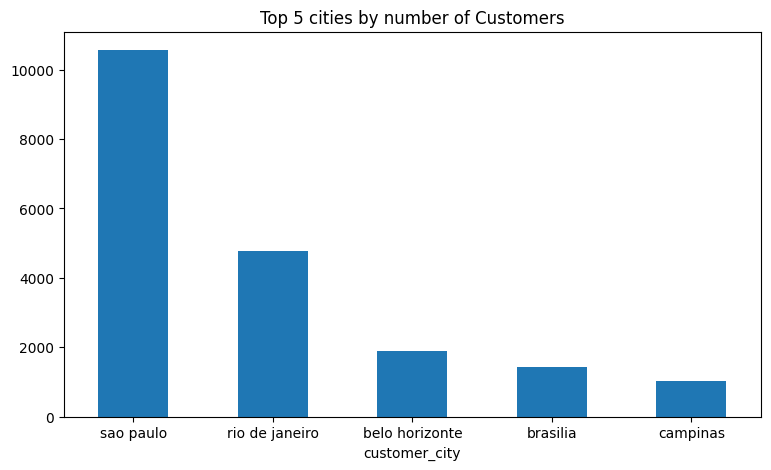

In [18]:
df_customers["customer_city"].value_counts().head().plot.bar(title="Top 5 cities by number of Customers", x = "City name", y = "Number of clients", rot = 0, figsize = (9,5))

<Axes: title={'center': 'Top 5 states by number of Customers'}, xlabel='customer_state'>

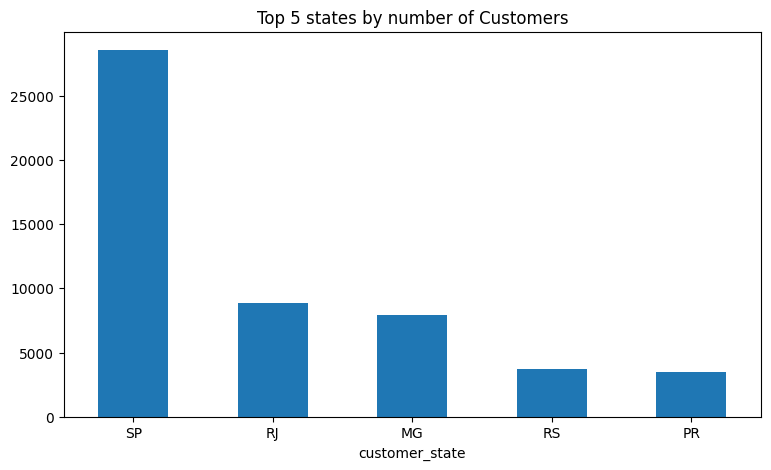

In [19]:
df_customers["customer_state"].value_counts().head().plot.bar(title="Top 5 states by number of Customers", x = "State name", y = "Number of clients", rot = 0, figsize = (9,5))

#### Geolocation table

In [20]:
print(f"Number of duplicated rows: {len(df_geolocation[df_geolocation.duplicated()])}\n")
df_geolocation.info()

Number of duplicated rows: 271868

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


Number of NaN values 

In [21]:
df_geolocation.isna().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

% of NaN values

In [22]:
df_geolocation.isna().mean()*100

geolocation_zip_code_prefix    0.0
geolocation_lat                0.0
geolocation_lng                0.0
geolocation_city               0.0
geolocation_state              0.0
dtype: float64

#### Sellers table

In [23]:
print(f"Number of duplicated rows: {len(df_sellers[df_sellers.duplicated()])}\n")
df_sellers.info()

Number of duplicated rows: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             2390 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


Number of NaN values 

In [24]:
df_sellers.isna().sum()

seller_id                   0
seller_zip_code_prefix      0
seller_city               705
seller_state                0
dtype: int64

% of NaN values

In [25]:
df_sellers.isna().mean()*100

seller_id                  0.000000
seller_zip_code_prefix     0.000000
seller_city               22.778675
seller_state               0.000000
dtype: float64

<Axes: title={'center': 'Top 5 cities by number of Sellers'}, xlabel='seller_city'>

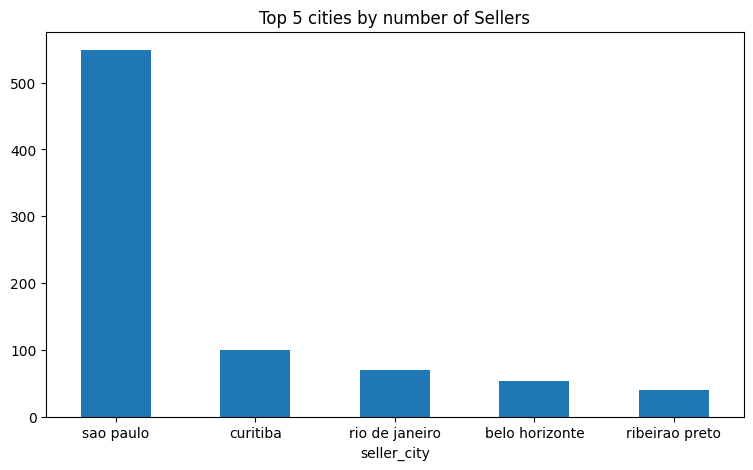

In [26]:
df_sellers["seller_city"].value_counts().head().plot.bar(title="Top 5 cities by number of Sellers", x = "City name", y = "Number of Sellers", rot = 0, figsize = (9,5))

<Axes: title={'center': 'Top 5 states by number of Sellers'}, xlabel='seller_state'>

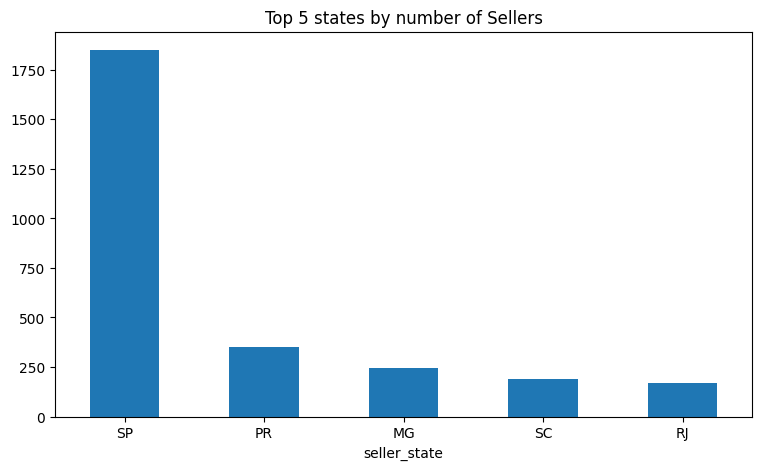

In [27]:
df_sellers["seller_state"].value_counts().head().plot.bar(title="Top 5 states by number of Sellers", x = "State name", y = "Number of Sellers", rot = 0, figsize = (9,5))

#### Orders table

In [28]:
print(f"Number of duplicated rows: {len(df_orders[df_orders.duplicated()])}\n")
df_orders.info()

Number of duplicated rows: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99102 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


Number of NaN values 

In [29]:
df_orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date     339
dtype: int64

% of NaN values

In [30]:
df_orders.isna().mean()*100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.340906
dtype: float64

Number of orders for each status

In [31]:
df_orders["order_status"].value_counts()

order_status
delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: count, dtype: int64

#### Order payments table

In [32]:
print(f"Number of duplicated rows: {len(df_order_payments[df_order_payments.duplicated()])}\n")
df_order_payments.info()

Number of duplicated rows: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         84314 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Number of NaN values 

In [33]:
df_order_payments.isna().sum()

order_id                    0
payment_sequential          0
payment_type                0
payment_installments        0
payment_value           19572
dtype: int64

% of NaN values

In [34]:
df_order_payments.isna().mean()*100

order_id                 0.000000
payment_sequential       0.000000
payment_type             0.000000
payment_installments     0.000000
payment_value           18.839882
dtype: float64

<Axes: title={'center': 'Number of payments made in each payment type'}, xlabel='payment_type'>

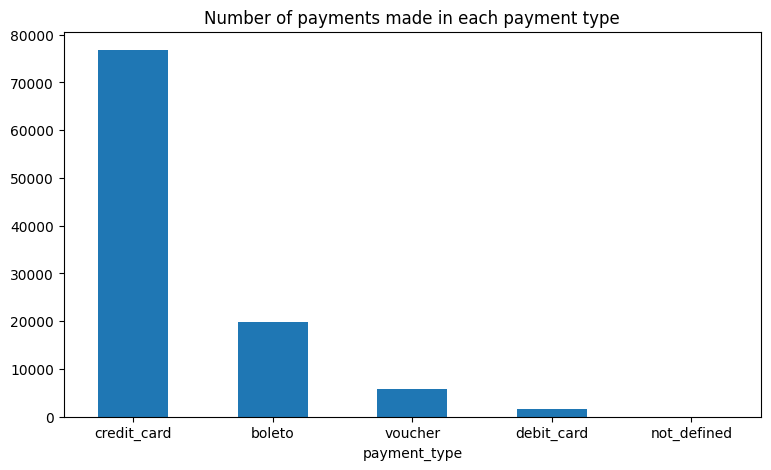

In [35]:
df_order_payments["payment_type"].value_counts().plot.bar(title = "Number of payments made in each payment type", x = "payment type", y = "number of payments", rot = 0, figsize = (9,5))

#### Order items table

In [36]:
print(f"Number of duplicated rows: {len(df_order_items[df_order_items.duplicated()])}\n")
df_order_items.info()

Number of duplicated rows: 0

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


Number of NaN values 

In [37]:
df_order_items.isna().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

% of NaN values

In [38]:
df_order_items.isna().mean()*100

order_id               0.0
order_item_id          0.0
product_id             0.0
seller_id              0.0
shipping_limit_date    0.0
price                  0.0
freight_value          0.0
dtype: float64

In [39]:
df_order_items["price"].describe().round()

count    112650.0
mean        121.0
std         184.0
min           1.0
25%          40.0
50%          75.0
75%         135.0
max        6735.0
Name: price, dtype: float64

In [40]:
df_order_items["freight_value"].describe().round()

count    112650.0
mean         20.0
std          16.0
min           0.0
25%          13.0
50%          16.0
75%          21.0
max         410.0
Name: freight_value, dtype: float64

Top 5 Orders size by product's number 

In [41]:
unique_orders = df_order_items.groupby(by="order_id")['order_item_id'].idxmax()
df_order_items.loc[unique_orders]["order_item_id"].value_counts()

order_item_id
1     88863
2      7516
3      1322
4       505
5       204
6       198
7        22
8         8
10        8
12        5
11        4
9         3
20        2
14        2
15        2
13        1
21        1
Name: count, dtype: int64

#### Products table

In [42]:
df_products.isna().sum()

product_id                      0
product_category_name         610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

% of NaN values

In [43]:
df_products.isna().mean()*100

product_id                    0.000000
product_category_name         1.851234
product_name_length           1.851234
product_description_length    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

In [44]:
df_products["product_weight_g"].describe().round()

count    32949.0
mean      2276.0
std       4282.0
min          0.0
25%        300.0
50%        700.0
75%       1900.0
max      40425.0
Name: product_weight_g, dtype: float64

#### Product category translation

In [45]:
df_product_category_translations.isna().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

% of NaN values

In [46]:
df_product_category_translations.isna().mean()*100

product_category_name            0.0
product_category_name_english    0.0
dtype: float64

#### Order reviews table

In [47]:
df_order_reviews.isna().sum()

order_id                    2793
review_score                3073
review_comment_title       92714
review_comment_message     63674
review_creation_date        9324
review_answer_timestamp     9341
dtype: int64

% of NaN values

In [48]:
df_order_reviews.isna().mean()*100

order_id                    2.667138
review_score                2.934520
review_comment_title       88.535987
review_comment_message     60.804630
review_creation_date        8.903828
review_answer_timestamp     8.920062
dtype: float64

In [50]:
df_order_reviews.head()

,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,73fc7af87114b39712e6da79b0a377eb,4.0,None,None,2018-01-18,2018-01-18 21:46:59
1,a548910a1c6147796b98fdf73dbeba33,5.0,None,None,2018-03-10,2018-03-11 03:05:13
2,f9e4b658b201a9f2ecdecbb34bed034b,5.0,None,None,2018-02-17,2018-02-18 14:36:24
3,658677c97b385a9be170737859d3511b,5.0,None,Recebi bem antes do prazo estipulado.,2017-04-21,2017-04-21 22:02:06
4,8e6bfb81e283fa7e4f11123a3fb894f1,5.0,None,ParabĂ©ns lojas lannister adorei comprar pela ...,2018-03-01,2018-03-02 10:26:53


In [53]:
df_order_reviews["review_score"].value_counts()

review_score
5.0        57328
4.0        19142
1.0        11424
3.0         8179
2.0         3151
           ...  
42753.0        1
43302.0        1
43301.0        1
42944.0        1
42816.0        1
Name: count, Length: 573, dtype: int64

In [56]:
df_order_reviews["review_score"].value_counts().head(10)

review_score
5.0        57328
4.0        19142
1.0        11424
3.0         8179
2.0         3151
43089.0       15
43331.0       15
43179.0       14
43231.0       14
43315.0       14
Name: count, dtype: int64